In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


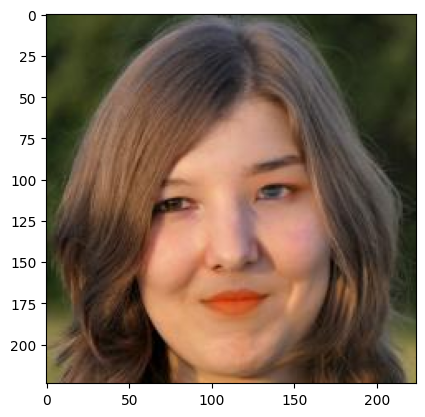

In [ ]:
import matplotlib.pyplot as plt

# Define the image path
image_path = "/content/drive/MyDrive/dataset/Split Data/test/Fake/easy_102_0101.jpg"  # Replace with your actual path

# Read the image using imread
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set your directories and parameters
train_dir = '/content/drive/My Drive/dataset/Split Data/train'
val_dir = '/content/drive/My Drive/dataset/Split Data/val'
test_dir = '/content/drive/My Drive/dataset/Split Data/test'
input_shape = (224, 224, 3)  # Update to 224x224
batch_size = 32
epochs = 20

# Use VGG16 as the base model, excluding the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   fill_mode='nearest')

# Data augmentation for validation and test sets (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up generators for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),  # Update to 224x224
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224, 224),  # Update to 224x224
                                                batch_size=batch_size,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),  # Update to 224x224
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))



# Print train and val accuracies
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(f'Train accuracy: {train_acc[-1]}')
print(f'Validation accuracy: {val_acc[-1]}')

Found 1428 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 307 images belonging to 2 classes.
Epoch 1/20
45/45 [==============================] - 32s 633ms/step - loss: 5.5095 - accuracy: 0.5322 - val_loss: 0.7147 - val_accuracy: 0.5686
Epoch 2/20
45/45 [==============================] - 26s 585ms/step - loss: 0.6822 - accuracy: 0.5462 - val_loss: 0.6725 - val_accuracy: 0.6078
Epoch 3/20
45/45 [==============================] - 26s 580ms/step - loss: 0.6712 - accuracy: 0.6064 - val_loss: 0.7084 - val_accuracy: 0.5359
Epoch 4/20
45/45 [==============================] - 26s 584ms/step - loss: 0.6413 - accuracy: 0.6190 - val_loss: 0.6721 - val_accuracy: 0.5850
Epoch 5/20
45/45 [==============================] - 26s 575ms/step - loss: 0.6190 - accuracy: 0.6268 - val_loss: 0.6597 - val_accuracy: 0.6373
Epoch 6/20
45/45 [==============================] - 27s 610ms/step - loss: 0.6039 - accuracy: 0.6478 - val_loss: 0.6986 - val_accuracy: 0.6209
Epoch 7/20
45/45 [

In [ ]:
# Evaluate on test set
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

10/10 [==============================] - 2s 142ms/step - loss: 0.7315 - accuracy: 0.6580
Test accuracy: 0.6579804420471191


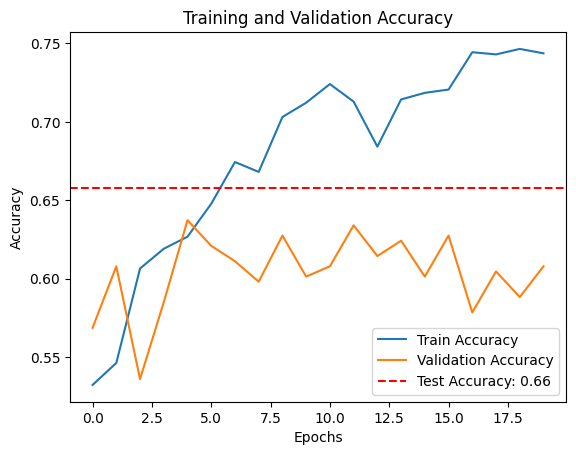

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Test Accuracy: {accuracy:.2f}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

Found 307 images belonging to 2 classes.
1/1 [==============================] - 1s 875ms/step


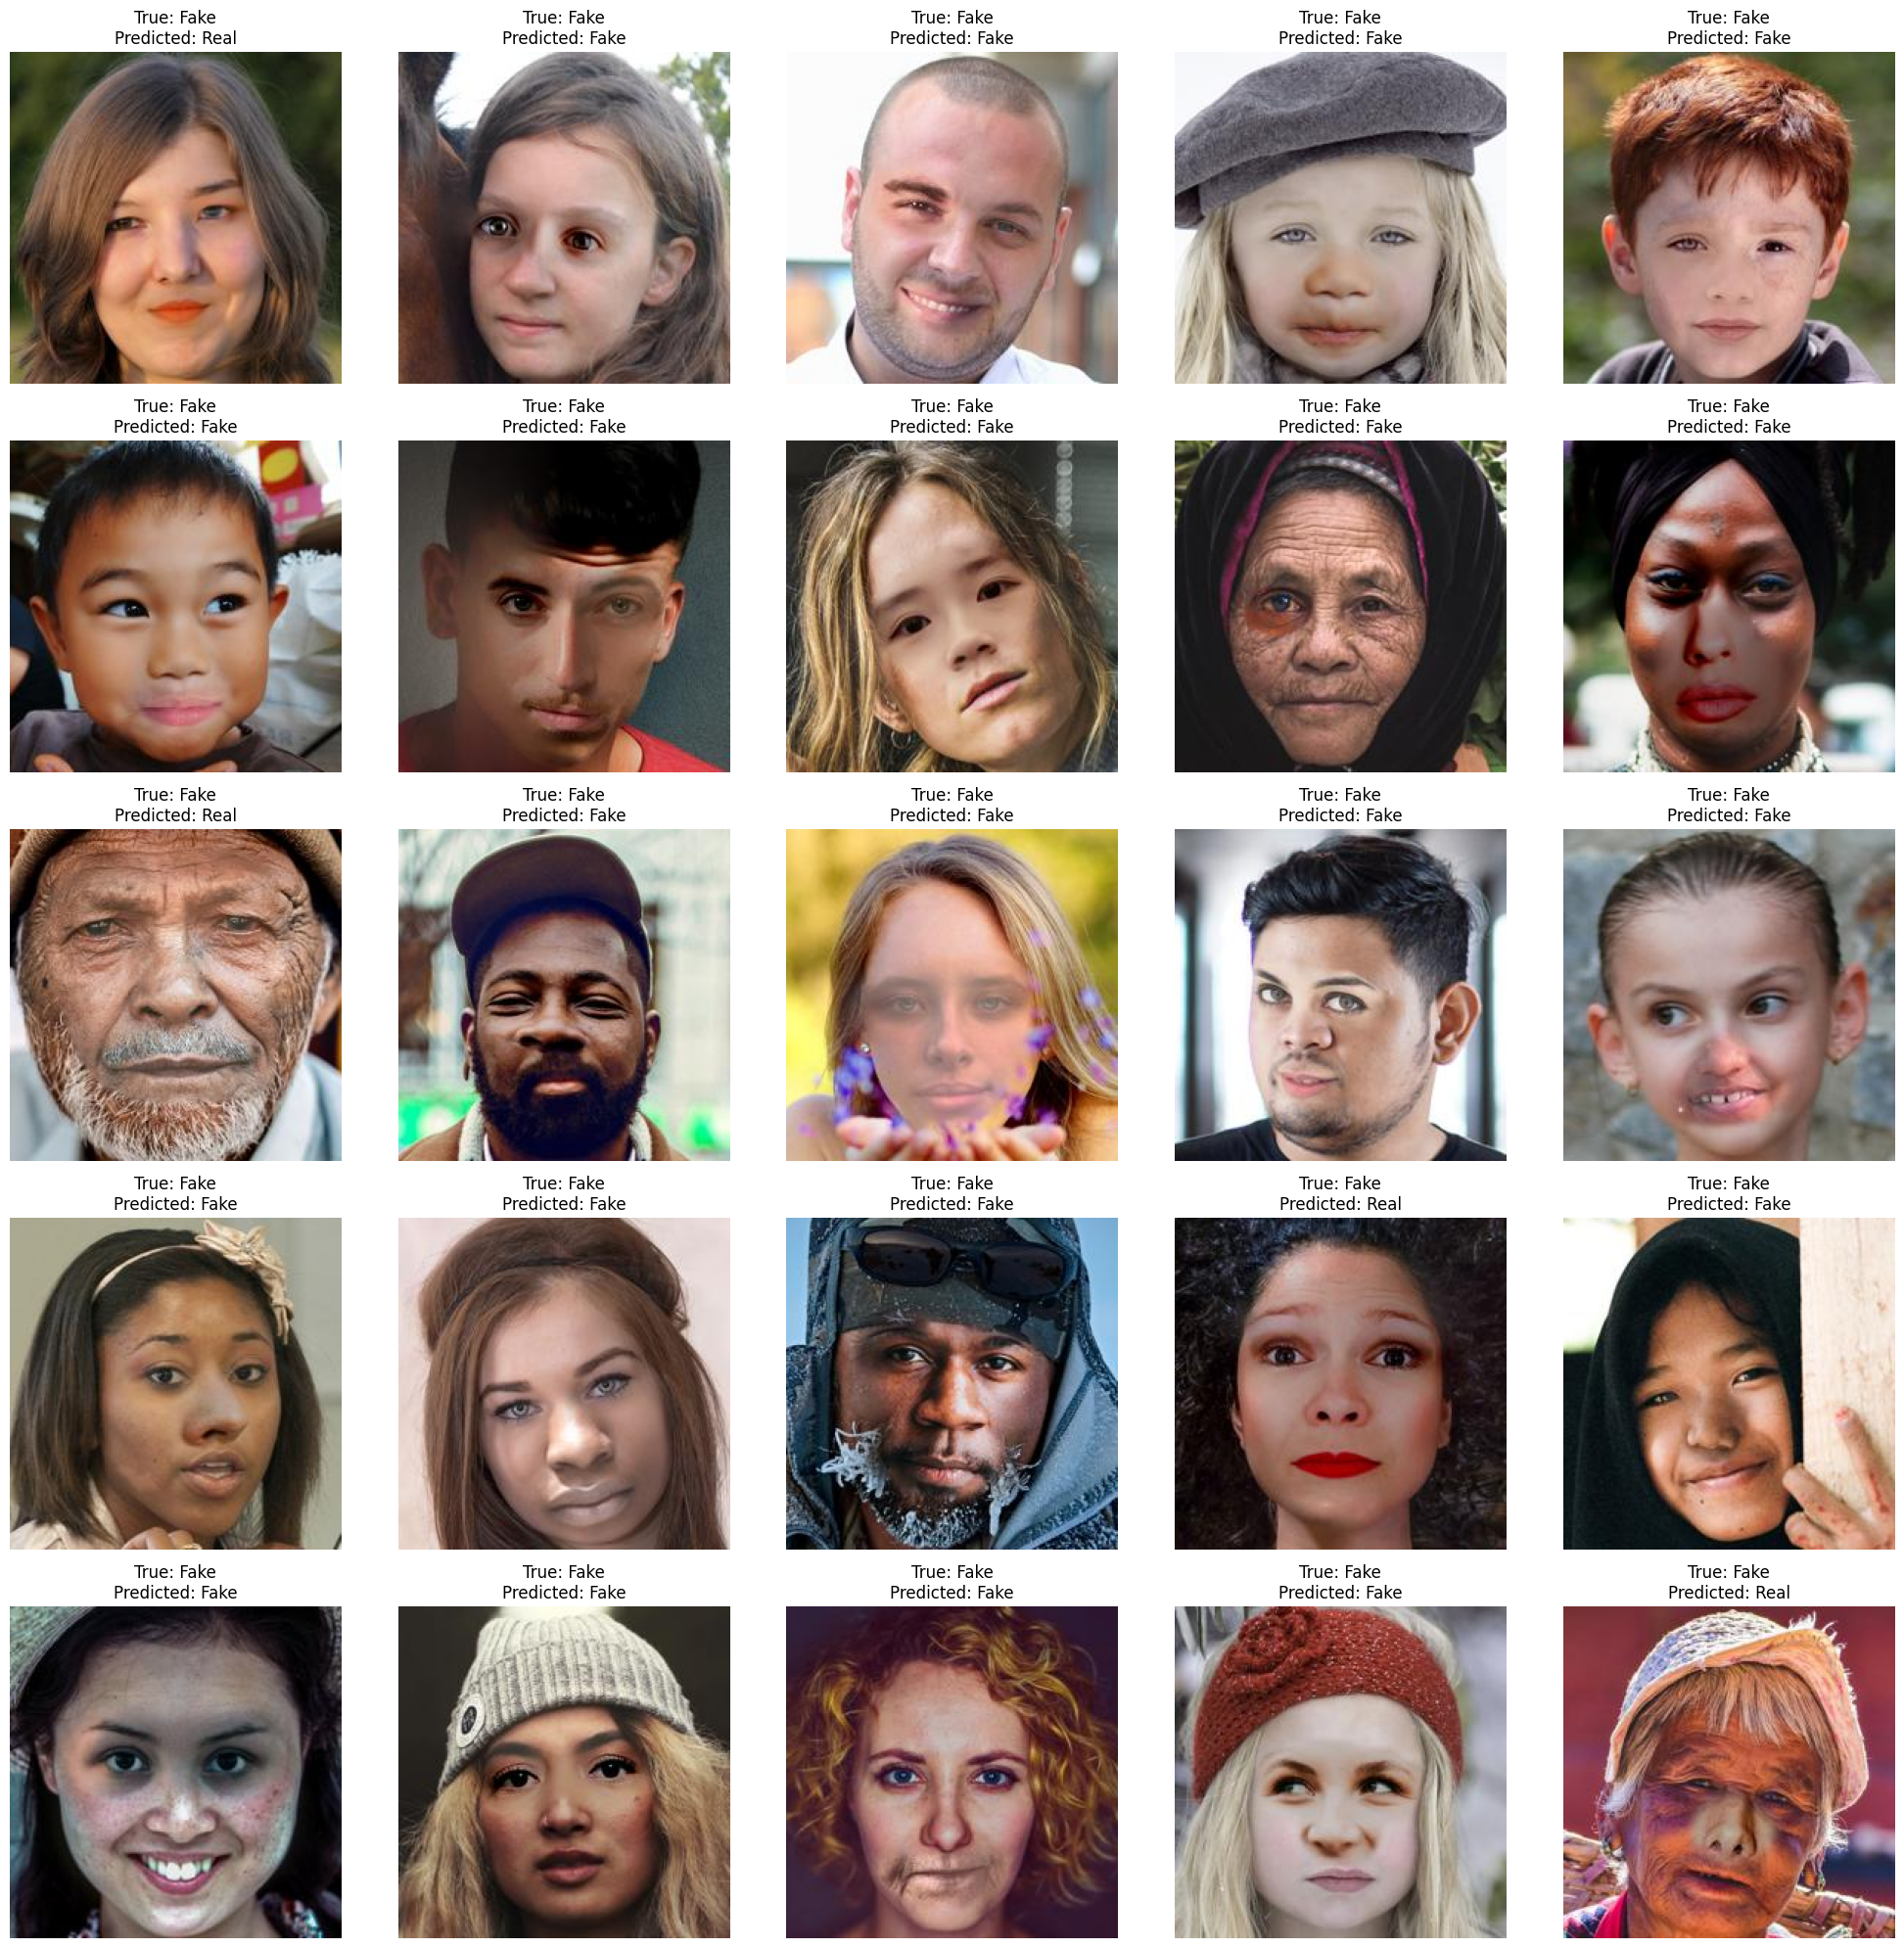

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Data augmentation for test sets (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up generator for the test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),  # Update to 224x224
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

# Get a batch of test images and labels
test_images, test_labels = next(test_generator)

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()



def display_images_with_labels(images, true_labels, predicted_labels, class_indices, num_images=20):
    rows = num_images // 5 + (num_images % 5 > 0)  # Calculate the number of rows needed
    cols = 5  # Set a fixed number of columns
    fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))  # Adjust the figure size

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i in range(num_images):
        axes[i].imshow(images[i])
        true_label = list(class_indices.keys())[list(class_indices.values()).index(true_labels[i])]
        predicted_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_labels[i])]
        axes[i].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
        axes[i].axis('off')

    # Hide any unused subplots
    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



# Get class indices (mapping from class label to class index)
class_indices = test_generator.class_indices

# Display images with true and predicted labels
display_images_with_labels(test_images, test_labels, predicted_labels, class_indices, num_images=25)

In [33]:
# Save the model
model_save_path = '/content/drive/My Drive/dataset/model/mobilenetv2_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

from google.colab import files
files.download(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/dataset/model/mobilenetv2_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>